In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od
import os 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [4]:
od.download('https://www.kaggle.com/datasets/blastchar/telco-customer-churn')

Skipping, found downloaded files in "./telco-customer-churn" (use force=True to force download)


In [44]:
df=pd.read_csv('/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [45]:
df=df.drop('customerID', axis='columns')

In [91]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [47]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [48]:
df.TotalCharges=pd.to_numeric(df['TotalCharges'], errors='coerce')

In [61]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [68]:
df.Churn=df.Churn.replace({'Yes': '1', 'No': '0'})


In [100]:
df.Churn=pd.to_numeric(df['Churn'])

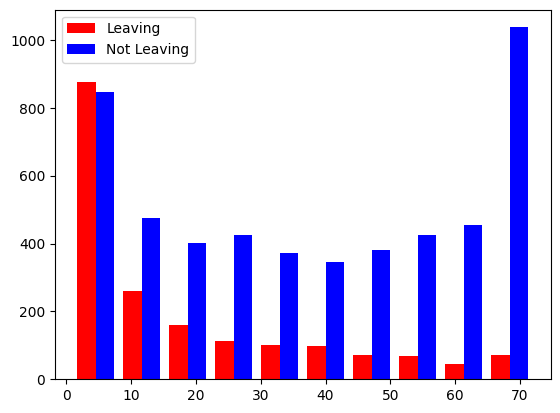

In [106]:
plt.hist([df.tenure[df['Churn']==1], df.tenure[df['Churn']==0]],color=['red','blue'],label=['Leaving','Not Leaving'])
plt.legend()

not Conculsive


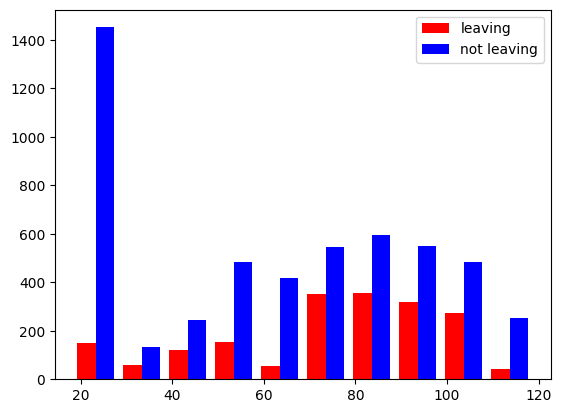

In [117]:
plt.hist([df[df.Churn==1].MonthlyCharges,df[df.Churn==0].MonthlyCharges],color=['red','blue'],label=['leaving','not leaving'])
plt.legend()
print('not Conculsive')

In [122]:
for column in df.columns:
    print(f'{column}:{df[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [121]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [124]:
df.replace({'Yes':1,'No':0},inplace=True)

In [134]:
for column in df.columns:
    print(f'{column}:{df[column].unique()}')

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'NoInternetService']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


convert male to 1 and female to 0

In [129]:
df.gender=df.gender.replace({'Male':1,'Female':0})

perform one hot encoding in columns with more than two different types


In [133]:
df.InternetService=df.InternetService.replace(0,'NoInternetService')

In [179]:
df_new=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],dtype=int)

In [180]:
from sklearn.preprocessing import MinMaxScaler

In [181]:
scaling_col=['tenure','MonthlyCharges','TotalCharges']
scaler=MinMaxScaler()
df_new[scaling_col]=scaler.fit_transform(df_new[scaling_col])

In [182]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_NoInternetService,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [183]:
x=df_new.drop('Churn',axis=1)
y=df_new['Churn']


In [186]:
from sklearn.model_selection import train_test_split

In [192]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [218]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential


In [220]:
tf.debugging.set_log_device_placement(False)

In [ ]:
model=keras.Sequential(
    [
        keras.layers.Input(shape=(26,)),
        keras.layers.Dense(units=20,activation='relu'),
        keras.layers.Dense(units=10,activation='relu'),
        keras.layers.Dense(units=1,activation='sigmoid')
        
    ])

In [ ]:
model.compile(  
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [ ]:
model.fit(X_train,Y_train,epochs=100)

In [ ]:
model.evaluate(X_test,Y_test)

In [ ]:
predicted_value=model.predict(X_test)

In [231]:
predicted_cat=[]
for i in predicted_value:
    if i>0.5:
        predicted_cat.append(1)
    else:
        predicted_cat.append(0)

In [233]:
from sklearn.metrics import classification_report,confusion_matrix

In [234]:
print(classification_report(Y_test,predicted_cat))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.67      0.48      0.56       369

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [238]:
cn=confusion_matrix(Y_test,predicted_cat)

In [241]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Actual')

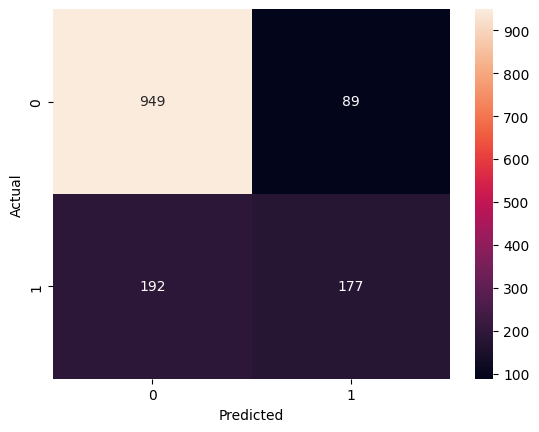

In [245]:
sns.heatmap(cn,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')